In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
os.chdir('/content/drive/My Drive/Bootcamp ML2020/')
os.listdir('.')
dataset = pd.read_csv('auto.csv')
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

In [ ]:
dataset.replace("?", np.nan, inplace=True)

In [ ]:
dataset.isnull().sum().sort_values()

symboling             0
city-mpg              0
compression-ratio     0
fuel-system           0
 engine-size          0
num-of-cylinders      0
engine-type           0
curb-weight           0
highway-mpg           0
width                 0
height                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
length                0
num-of-doors          2
horsepower            2
peak-rpm              2
bore                  4
stroke                4
price                 4
normalized-losses    41
dtype: int64

In [ ]:
dataset.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', ' engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
avg_norm_loss = dataset["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses: ", avg_norm_loss)

avg_bore = dataset['bore'].astype('float').mean(axis=0)
print("Average of bore: ", avg_bore)

avg_stroke = dataset["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)

avg_horsepower = dataset['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

avg_peakrpm = dataset['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average of normalized-losses:  122.0
Average of bore:  3.3297512437810957
Average of stroke: 3.2554228855721337
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079


In [ ]:
dataset["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
dataset["stroke"].replace(np.nan, avg_stroke, inplace=True)
dataset["bore"].replace(np.nan, avg_bore, inplace=True)
dataset['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
dataset['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [ ]:
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
 engine-size         0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [ ]:
dataset['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
dataset["num-of-doors"].replace(np.nan, "four", inplace=True)

In [ ]:
dataset.dropna(subset=["price"], axis=0, inplace=True)

In [ ]:
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
 engine-size         0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
dataset.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
dataset[["bore", "stroke", "price", "peak-rpm"]] = dataset[["bore", "stroke", "price", "peak-rpm"]].astype("float")
dataset[["normalized-losses", "horsepower"]] = dataset[["normalized-losses", "horsepower"]].astype("int")

In [ ]:
dataset.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [ ]:
# dataset.drop(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'], axis=1, inplace=True)

# dataset.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f884aa860b8>,
      dtype=object)

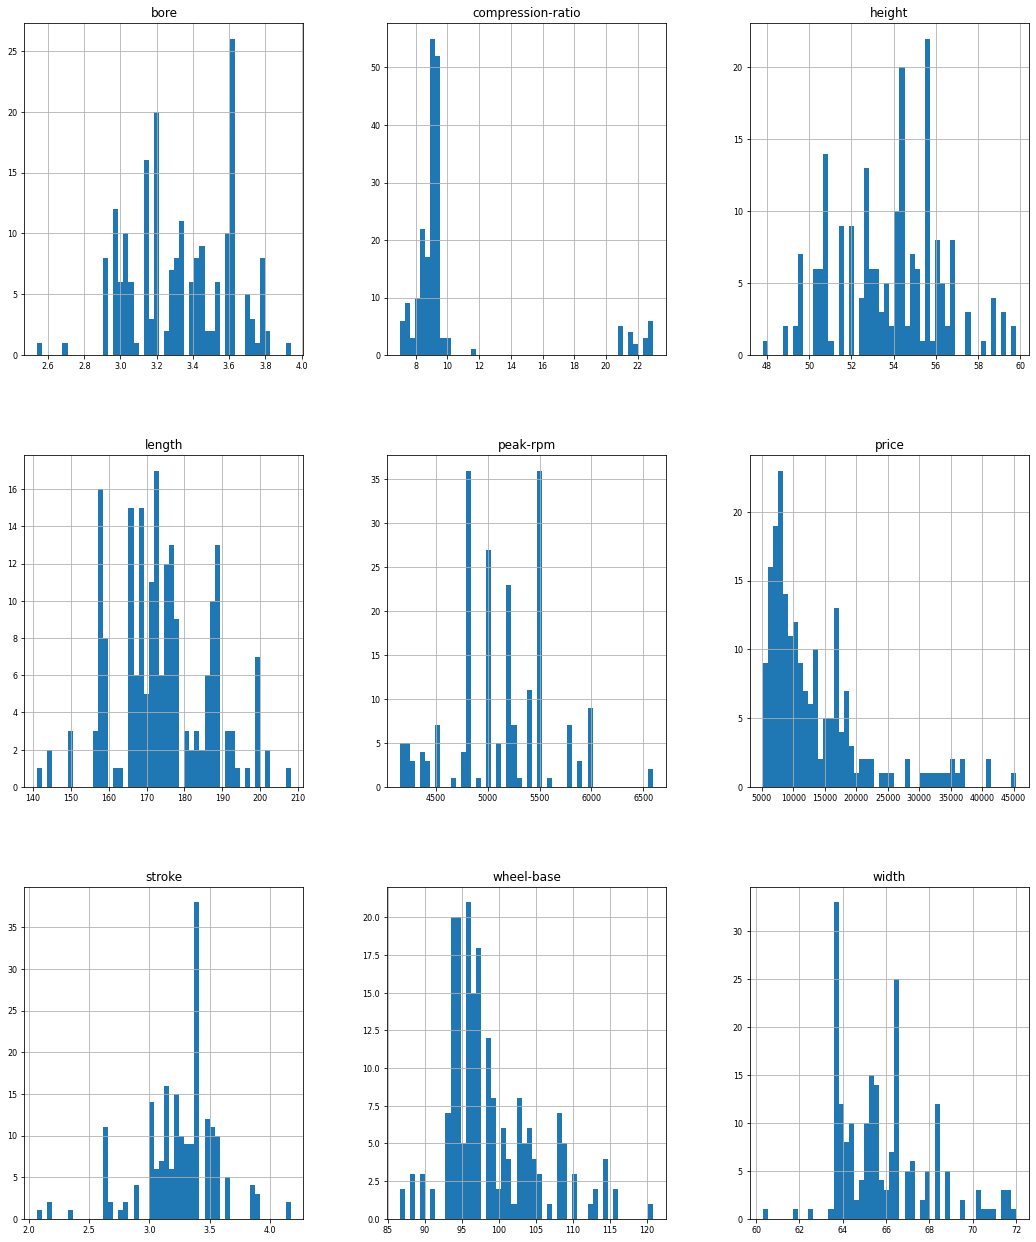

In [ ]:
dataset_numbers = dataset.select_dtypes(include = ['float64'])

dataset_numbers.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
print(dataset_numbers.columns)
print(dataset.columns)

Index(['wheel-base', 'length', 'width', 'height', 'bore', 'stroke',
       'compression-ratio', 'peak-rpm', 'price'],
      dtype='object')
Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', ' engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [ ]:
dataset['city-L/100km'] = 235 / dataset["city-mpg"]
dataset['highway-L/100km'] = 235 / dataset["highway-mpg"]

In [ ]:
print(min(dataset["horsepower"]), max(dataset["horsepower"]))

bins = np.linspace(min(dataset["horsepower"]), max(dataset["horsepower"]), 4)

print(bins)

48 262
[ 48.         119.33333333 190.66666667 262.        ]


In [ ]:
bins = np.linspace(min(dataset["horsepower"]), max(dataset["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
dataset['horsepower-binned'] = pd.cut(dataset['horsepower'], bins, labels=group_names, include_lowest=True )
dataset[['horsepower','horsepower-binned']].head()

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [ ]:
dataset["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

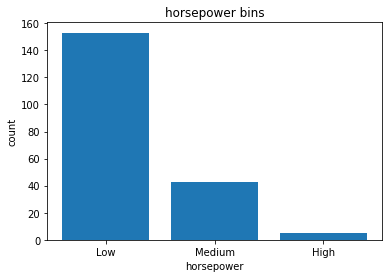

In [ ]:
plt.bar(group_names, dataset["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [ ]:
dataset["fuel-type"].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [ ]:
fuel_categorized = pd.get_dummies(dataset["fuel-type"])
fuel_categorized.head()

# dataset.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
dataset = pd.concat([dataset, fuel_categorized], axis=1)

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


In [ ]:
aspiration_turbo = pd.get_dummies(dataset['aspiration'])

aspiration_turbo

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,0,1
202,1,0
203,0,1


In [ ]:
dataset = pd.concat([dataset, aspiration_turbo], axis=1)

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [ ]:
dataset['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

In [ ]:
engine_dummy = pd.get_dummies(dataset['engine-location'])

engine_dummy

,front,rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,1,0
202,1,0
203,1,0


In [ ]:
dataset = pd.concat([dataset, engine_dummy], axis=1)

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo,front,rear
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0,1,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0,1,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0,1,0


In [ ]:
dataset["num-of-cylinders"].value_counts()

four      157
six        24
five       10
two         4
eight       4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [ ]:
dataset["num-of-doors"].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

In [ ]:
cleanup_nums = {"num-of-doors":     {"four": 4, "two": 2},
                "num-of-cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

dataset.replace(cleanup_nums, inplace=True)
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo,front,rear
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0,1,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0,1,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0,1,0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0,1,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0,1,0


In [ ]:
dataset["body-style"] = dataset["body-style"].astype('category')

In [ ]:
dataset.dtypes

symboling               int64
normalized-losses       int64
make                   object
fuel-type              object
aspiration             object
num-of-doors            int64
body-style           category
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders        int64
 engine-size            int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
highway-L/100km       float64
horsepower-binned    category
diesel                  uint8
gas                     uint8
std                     uint8
turbo                   uint8
front     

In [ ]:
dataset["body-style-cat"] = dataset["body-style"].cat.codes
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo,front,rear,body-style-cat
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0,1,0,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0,1,0,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0,1,0,2
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0,1,0,3
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0,1,0,3


In [ ]:
body_style_dummy = pd.get_dummies(dataset['body-style'])

body_style_dummy

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,0,0,0,1,0
201,0,0,0,1,0
202,0,0,0,1,0
203,0,0,0,1,0


In [ ]:
dataset = pd.concat([dataset, body_style_dummy], axis=1)

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo,front,rear,body-style-cat,convertible,hardtop,hatchback,sedan,wagon
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0,1,0,0,1,0,0,0,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0,1,0,0,1,0,0,0,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0,1,0,2,0,0,1,0,0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0,1,0,3,0,0,0,1,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0,1,0,3,0,0,0,1,0


In [ ]:
horsepower_dummy = pd.get_dummies(dataset['horsepower-binned'])

dataset = pd.concat([dataset, horsepower_dummy], axis=1)

dataset.rename(columns={'Low':'horsepower-low', 'Medium':'horsepower-medium', 'High':'horsepower-high'}, inplace=True)

dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo,front,rear,body-style-cat,convertible,hardtop,hatchback,sedan,wagon,horsepower-low,horsepower-medium,horsepower-high
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0,1,0,2,0,0,1,0,0,0,1,0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0,1,0,3,0,0,0,1,0,1,0,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0,1,0,3,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391,8.392857,Low,0,1,1,0,1,0,3,0,0,0,1,0,1,0,0
201,-1,95,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0,12.368421,9.400000,Medium,0,1,0,1,1,0,3,0,0,0,1,0,0,1,0
202,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0,13.055556,10.217391,Medium,0,1,1,0,1,0,3,0,0,0,1,0,0,1,0
203,-1,95,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0,9.038462,8.703704,Low,1,0,0,1,1,0,3,0,0,0,1,0,1,0,0


In [ ]:
make_dummy = pd.get_dummies(dataset['make'])

dataset = pd.concat([dataset, make_dummy], axis=1)

# dataset.rename(columns={'Low':'horsepower-low', 'Medium':'horsepower-medium', 'High':'horsepower-high'}, inplace=True)

dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo,front,rear,body-style-cat,convertible,hardtop,hatchback,sedan,wagon,horsepower-low,horsepower-medium,horsepower-high,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0,1,0,2,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0,1,0,3,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0,1,0,3,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391,8.392857,Low,0,1,1,0,1,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,-1,95,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0,12.368421,9.400000,Medium,0,1,0,1,1,0,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0,13.055556,10.217391,Medium,0,1,1,0,1,0,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,-1,95,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0,9.038462,8.703704,Low,1,0,0,1,1,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
drive_wheels_dummy = pd.get_dummies(dataset['drive-wheels'])

dataset = pd.concat([dataset, drive_wheels_dummy], axis=1)

# dataset.rename(columns={'Low':'horsepower-low', 'Medium':'horsepower-medium', 'High':'horsepower-high'}, inplace=True)

dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo,front,rear,body-style-cat,convertible,hardtop,hatchback,sedan,wagon,horsepower-low,horsepower-medium,horsepower-high,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,4wd,fwd,rwd
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0,1,0,2,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0,1,0,3,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0,1,0,3,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391,8.392857,Low,0,1,1,0,1,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
201,-1,95,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0,12.368421,9.400000,Medium,0,1,0,1,1,0,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
202,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0,13.055556,10.217391,Medium,0,1,1,0,1,0,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
203,-1,95,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0,9.038462,8.703704,Low,1,0,0,1,1,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
engine_type_dummy = pd.get_dummies(dataset['engine-type'])

dataset = pd.concat([dataset, engine_type_dummy], axis=1)

dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo,front,rear,body-style-cat,convertible,hardtop,hatchback,sedan,wagon,horsepower-low,horsepower-medium,horsepower-high,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,4wd,fwd,rwd,dohc,l,ohc,ohcf,ohcv,rotor
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0,1,0,2,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0,1,0,3,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0,1,0,3,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391,8.392857,Low,0,1,1,0,1,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
201,-1,95,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0,12.368421,9.400000,Medium,0,1,0,1,1,0,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
202,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0,13.055556,10.217391,Medium,0,1,1,0,1,0,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
203,-1,95,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0,9.038462,8.703704,Low,1,0,0,1,1,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [ ]:
fuel_system_dummy = pd.get_dummies(dataset['fuel-system'])

dataset = pd.concat([dataset, fuel_system_dummy], axis=1)

# dataset.rename(columns={'Low':'horsepower-low', 'Medium':'horsepower-medium', 'High':'horsepower-high'}, inplace=True)

dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo,front,rear,body-style-cat,convertible,hardtop,hatchback,sedan,...,horsepower-high,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,4wd,fwd,rwd,dohc,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0,1,0,2,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0,1,0,3,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0,1,0,3,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391,8.392857,Low,0,1,1,0,1,0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,-1,95,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0,12.368421,9.400000,Medium,0,1,0,1,1,0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0,13.055556,10.217391,Medium,0,1,1,0,1,0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
203,-1,95,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0,9.038462,8.703704,Low,1,0,0,1,1,0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
dataset.drop(['make', 'fuel-type', 'aspiration', 'body-style', 'engine-type', 'fuel-system', 'horsepower', 'city-mpg', 'highway-mpg', 'body-style-cat', 'drive-wheels', 'engine-location', 'horsepower-binned'], axis=1, inplace=True)

dataset

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,peak-rpm,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo,front,rear,convertible,hardtop,hatchback,sedan,wagon,horsepower-low,horsepower-medium,horsepower-high,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,4wd,fwd,rwd,dohc,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,5000.0,13495.0,11.190476,8.703704,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,5000.0,16500.0,11.190476,8.703704,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,122,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,5000.0,16500.0,12.368421,9.038462,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,164,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,5500.0,13950.0,9.791667,7.833333,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,164,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,5500.0,17450.0,13.055556,10.681818,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,5400.0,16845.0,10.217391,8.392857,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,-1,95,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,5300.0,19045.0,12.368421,9.400000,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,-1,95,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,5500.0,21485.0,13.055556,10.217391,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
203,-1,95,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,4800.0,22470.0,9.038462,8.703704,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
Y = dataset['price'] #label
x = dataset.drop(['price'], axis=1) #features

**Nomor 1**

In [ ]:
def acc_scaler(arr_name, arr_scl):
  # scaler = arr_scl
  X = arr_scl.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  lm = LinearRegression()
  lm.fit(x_train, y_train)
  y_pred = lm.predict(x_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(arr_name)
  print()
  print('Accuracy of ',arr_name,' on train set : {:.2f}'.format(lm.score(x_train, y_train))) # .score() -> Accuracy
  print('Accuracy of ',arr_name,' on test set  : {:.2f}'.format(lm.score(x_test, y_test))) # .score() -> Accuracy
  print()
  print("MSE (Mean Squared Error)                   :", mse)
  print("MAE (Mean Absolute Error)                  :", mae)
  print("r^2 score                                  :", r2)
  print('RMSE (Root Mean Squared Error)             :', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('====================================================================')

arr_scl=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
arr_name=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(arr_scl)):
  acc_scaler(arr_name[a], arr_scl[a])

Standar Scaler

Accuracy of  Standar Scaler  on train set : 0.97
Accuracy of  Standar Scaler  on test set  : -10654214115551829032960.00

MSE (Mean Squared Error)                   : 4.523783605952371e+29
MAE (Mean Absolute Error)                  : 184338896881006.25
r^2 score                                  : -1.065421411555183e+22
RMSE (Root Mean Squared Error)             : 672590782419174.2
Power Transformer Yeo Johnson

Accuracy of  Power Transformer Yeo Johnson  on train set : 0.96
Accuracy of  Power Transformer Yeo Johnson  on test set  : -1664280106092024823808.00

MSE (Mean Squared Error)                   : 7.066540035704757e+28
MAE (Mean Absolute Error)                  : 60277001337114.625
r^2 score                                  : -1.6642801060920248e+21
RMSE (Root Mean Squared Error)             : 265829645369073.88
Quantile Transformer

Accuracy of  Quantile Transformer  on train set : 0.89
Accuracy of  Quantile Transformer  on test set  : -12535677248034771650478080

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (201). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Dari berbagai model scaler yang saya gunakan, saya menilai bahwa model robust scaler merupakan model scaler yang lebih baik digunakan untuk auto.csv yang menggunakan model Linear Regression, yang mana nilai yang di dapat adalah 0.7498611707738503

***Untuk Power Transformer Metode Box-Cox akan menghasilkan error seperti dibawah***

In [ ]:
scaler = PowerTransformer(method='box-cox', standardize=True)
X = scaler.fit_transform(x) #x=features
data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Box-Cox Transformation")
print()
print('Accuracy of box-cox on train set : {:.2f}'.format(lm.score(x_train, y_train))) # .score() -> Accuracy
print('Accuracy of box-cox on test set  : {:.2f}'.format(lm.score(x_test, y_test))) # .score() -> Accuracy
print()
print("MSE (Mean Squared Error)                   :", mse)
print("MAE (Mean Absolute Error)                  :", mae)
print("r^2 score                                  :", r2)
print('RMSE (Root Mean Squared Error)             :', np.sqrt(mean_squared_error(y_test, y_pred)))

ValueError: ignored

*Error ini disebakan karena **Box-Cox Transformation** hanya dapat digunakan untuk data yang benar benar positif, sedangkan angka 0 tidak dapat benar benar dikatakan positif maupun negatif. Dengan demikian, jika memang ingin menggunakan metode ini, maka harus dilakukan data cleaning. namun menurut saya dalam kasus ini kita tidak dapat menggunakan **Box-Cox Transformation** karena terdapat nilai 0 di dalam auto.csv*

**Soal Nomor 2**

**Random Forest Regressor**

In [ ]:
def ex_scaler(sclr):
  scaler = sclr
  X = scaler.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  arr_r2=[]
  arr_rmse=[]
  arr_estm=[]
  arr_rstatm=[]


  def random_param(est,rstat):
    rf = RandomForestRegressor(n_estimators=est,random_state=rstat)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('\trandom forest n_estimasi = ',est,'dan random_state = ',rstat)
    print("\tr^2 score                      :", r2)
    print('\tRMSE (Root Mean Squared Error) :', rmse)
    print('================================================================')
    arr_r2.append(r2)
    arr_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    arr_estm.append(est)
    arr_rstatm.append(rstat)

  arr_est=[50,100,200]
  arr_rstat=[0,10,15,20]
  for i in arr_est:
    for j in arr_rstat:
      random_param(i,j)

  max_arr2=max(arr_r2)
  # print(max_arr2)

  for i,j in enumerate(arr_r2):
    if max_arr2 == j:
      print('nilai r2 terbaik berada pada model random forest dengan n_estimasi',arr_estm[i],'dan random_state',arr_rstatm[i])
      print('dengan nilai r2 sebesar: ',arr_r2[i])
      print('dan dengan RMSE sebesar: ',arr_rmse[i])

sclr=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(n_quantiles=10, random_state=0),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
nm_sclr=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(sclr)):
  print('Untuk Scaler: ',nm_sclr[a])
  print('---------------------------')
  ex_scaler(sclr[a])
  print('*************************************************************************************************************************************************')

Untuk Scaler:  Standar Scaler
---------------------------
	random forest n_estimasi =  50 dan random_state =  0
	r^2 score                      : 0.9231765537749022
	RMSE (Root Mean Squared Error) : 1806.0804583037452
	random forest n_estimasi =  50 dan random_state =  10
	r^2 score                      : 0.9309064582993064
	RMSE (Root Mean Squared Error) : 1712.8089690124266
	random forest n_estimasi =  50 dan random_state =  15
	r^2 score                      : 0.9263211937310161
	RMSE (Root Mean Squared Error) : 1768.7297935624013
	random forest n_estimasi =  50 dan random_state =  20
	r^2 score                      : 0.9299885825406227
	RMSE (Root Mean Squared Error) : 1724.1483712324557
	random forest n_estimasi =  100 dan random_state =  0
	r^2 score                      : 0.928816154001394
	RMSE (Root Mean Squared Error) : 1738.5249405847749
	random forest n_estimasi =  100 dan random_state =  10
	r^2 score                      : 0.9322238467870192
	RMSE (Root Mean Squared Error

Untuk Random Forest nilai r2 terbaik didapat dengan menggunakan scaler Power Transformer Yeo Johnson dengan n_estimasi 200 dan random_state 20
dengan nilai r2 0.9353167719405096
dan dengan RMSE 1657.242429289172




**XGBoost**

In [ ]:
def ex_scaler(sclr):
  scaler = sclr
  X = scaler.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  arr_r2=[]
  arr_rmse=[]
  arr_estm=[]
  arr_lratem=[]


  def random_param(est,lrate):
    xr = xgb.XGBRegressor(n_estimators=est,learning_rate=lrate,objective ='reg:squarederror')
    xr.fit(x_train, y_train)
    y_pred = xr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('\tXGB Regressor n_estimasi = ',est,'dan learning_rate = ',lrate)
    print("\tr^2 score                      :", r2)
    print('\tRMSE (Root Mean Squared Error) :', rmse)
    print('================================================================')
    arr_r2.append(r2)
    arr_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    arr_estm.append(est)
    arr_lratem.append(lrate)

  arr_est=[50,100,200]
  arr_lrate=[0.01,0.05,0.1,0.5]
  for i in arr_est:
    for j in arr_lrate:
      random_param(i,j)

  max_arr2=max(arr_r2)
  # print(max_arr2)

  for i,j in enumerate(arr_r2):
    if max_arr2 == j:
      print('nilai r2 terbaik berada pada model XGB Regressor dengan n_estimasi',arr_estm[i],'dan learning_rate',arr_lratem[i])
      print('dengan nilai r2 sebesar: ',arr_r2[i])
      print('dan dengan RMSE sebesar: ',arr_rmse[i])

sclr=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(n_quantiles=10, random_state=0),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
nm_sclr=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(sclr)):
  print('Untuk Scaler: ',nm_sclr[a])
  print('---------------------------')
  ex_scaler(sclr[a])
  print('*************************************************************************************************************************************************')

Untuk Scaler:  Standar Scaler
---------------------------
	XGB Regressor n_estimasi =  50 dan learning_rate =  0.01
	r^2 score                      : -0.9733535858519324
	RMSE (Root Mean Squared Error) : 9153.615283588864
	XGB Regressor n_estimasi =  50 dan learning_rate =  0.05
	r^2 score                      : 0.8438387790944487
	RMSE (Root Mean Squared Error) : 2574.997423541975
	XGB Regressor n_estimasi =  50 dan learning_rate =  0.1
	r^2 score                      : 0.9264979796566908
	RMSE (Root Mean Squared Error) : 1766.6065620586253
	XGB Regressor n_estimasi =  50 dan learning_rate =  0.5
	r^2 score                      : 0.9358338620373349
	RMSE (Root Mean Squared Error) : 1650.6049809363733
	XGB Regressor n_estimasi =  100 dan learning_rate =  0.01
	r^2 score                      : 0.12527047289841198
	RMSE (Root Mean Squared Error) : 6094.345819102813
	XGB Regressor n_estimasi =  100 dan learning_rate =  0.05
	r^2 score                      : 0.9271913620172711
	RMSE (Root 

Untuk XGB Regressor nilai r2 terbaik didapat dengan menggunakan scaler Max Abs Scaler dengan n_estimasi 200 dan learning rate 0.1
dengan nilai r2 0.9379824687095073
dan dengan RMSE 1622.7343828322778

**SVM Regressor**

In [ ]:
def ex_scaler(sclr):
  scaler = sclr
  X = scaler.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  arr_r2=[]
  arr_rmse=[]
  arr_kernelm=[]


  def random_param(krnl):
    svmr = SVR(kernel=krnl)
    svmr.fit(x_train, y_train)
    y_pred = svmr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('\tSVR dengan kernel = ',krnl)
    print("\tr^2 score                      :", r2)
    print('\tRMSE (Root Mean Squared Error) :', rmse)
    print('================================================================')
    arr_r2.append(r2)
    arr_rmse.append(rmse)
    arr_kernelm.append(krnl)

  arr_kernel=['rbf','poly','linear']
  for i in arr_kernel:
    random_param(i)

  max_arr2=max(arr_r2)
  # print(max_arr2)

  for i,j in enumerate(arr_r2):
    if max_arr2 == j:
      print('nilai r2 terbaik berada pada model SVM dengan kernel',arr_kernelm[i])
      print('dengan nilai r2 sebesar: ',arr_r2[i])
      print('dan dengan RMSE sebesar: ',arr_rmse[i])

sclr=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(n_quantiles=10, random_state=0),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
nm_sclr=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(sclr)):
  print('Untuk Scaler: ',nm_sclr[a])
  print('---------------------------')
  ex_scaler(sclr[a])
  print('*************************************************************************************************************************************************')

Untuk Scaler:  Standar Scaler
---------------------------
	SVR dengan kernel =  rbf
	r^2 score                      : -0.128695224950248
	RMSE (Root Mean Squared Error) : 6922.748350584788
	SVR dengan kernel =  poly
	r^2 score                      : -0.1291830902818627
	RMSE (Root Mean Squared Error) : 6924.244327517656
	SVR dengan kernel =  linear
	r^2 score                      : 0.19609395410481067
	RMSE (Root Mean Squared Error) : 5842.420996246038
nilai r2 terbaik berada pada model SVM dengan kernel linear
dengan nilai r2 sebesar:  0.19609395410481067
dan dengan RMSE sebesar:  5842.420996246038
*************************************************************************************************************************************************
Untuk Scaler:  Power Transformer Yeo Johnson
---------------------------
	SVR dengan kernel =  rbf
	r^2 score                      : -0.1287267317299554
	RMSE (Root Mean Squared Error) : 6922.844971878264
	SVR dengan kernel =  poly
	r^2 score     

Untuk model SVM kernel Linear didapatkan hasil yang kurang baik, dikarenakan nilai r2 yang didapat sangat rendah yaitu 0.19609395410481067, dan RMSE 5842.420996246038 dengan menggunakan standar scaler


**KNN-Regressor**

In [ ]:
def ex_scaler(sclr):
  scaler = sclr
  X = scaler.fit_transform(x) #x=features
  data_x = pd.DataFrame(X, columns=x.columns) #pengganti features di materi

  x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10)

  arr_r2=[]
  arr_rmse=[]
  arr_kernelm=[]


  def random_param(knnr):
    knn = KNeighborsRegressor(knnr)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('\tKNN dengan nilai k = ',knnr)
    print("\tr^2 score                      :", r2)
    print('\tRMSE (Root Mean Squared Error) :', rmse)
    print('================================================================')
    arr_r2.append(r2)
    arr_rmse.append(rmse)
    arr_kernelm.append(knnr)

  arr_kernel=[1,3,5,7,9,11,13,15]
  for i in arr_kernel:
    random_param(i)

  max_arr2=max(arr_r2)
  # print(max_arr2)

  for i,j in enumerate(arr_r2):
    if max_arr2 == j:
      print('nilai r2 terbaik berada pada model KNN dengan nilai k',arr_kernelm[i])
      print('dengan nilai r2 sebesar: ',arr_r2[i])
      print('dan dengan RMSE sebesar: ',arr_rmse[i])

sclr=[StandardScaler(),PowerTransformer(method='yeo-johnson', standardize=True),QuantileTransformer(n_quantiles=10, random_state=0),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
nm_sclr=['Standar Scaler','Power Transformer Yeo Johnson','Quantile Transformer','Min Max Scaler','Max Abs Scaler','Robust Scaler']

for a in range(len(sclr)):
  print('Untuk Scaler: ',nm_sclr[a])
  print('---------------------------')
  ex_scaler(sclr[a])
  print('*************************************************************************************************************************************************')

Untuk Scaler:  Standar Scaler
---------------------------
	KNN dengan nilai k =  1
	r^2 score                      : 0.8912235896796966
	RMSE (Root Mean Squared Error) : 2149.104642567663
	KNN dengan nilai k =  3
	r^2 score                      : 0.8471068690772247
	RMSE (Root Mean Squared Error) : 2547.9106143879294
	KNN dengan nilai k =  5
	r^2 score                      : 0.8213575126138443
	RMSE (Root Mean Squared Error) : 2754.1182276301624
	KNN dengan nilai k =  7
	r^2 score                      : 0.7545854475087547
	RMSE (Root Mean Squared Error) : 3228.0507719542647
	KNN dengan nilai k =  9
	r^2 score                      : 0.7532960604214025
	RMSE (Root Mean Squared Error) : 3236.5196143375633
	KNN dengan nilai k =  11
	r^2 score                      : 0.7830239661806954
	RMSE (Root Mean Squared Error) : 3035.2612964522586
	KNN dengan nilai k =  13
	r^2 score                      : 0.7792204909060108
	RMSE (Root Mean Squared Error) : 3061.7489856522893
	KNN dengan nilai k =  1

Untuk KNN Regressor, pada kernel = 1 dan model scaler StandardScaler dan PowerTransformer yeo Johnson memiliki akurasi r2 terbaik sebesar  0.8912235896796966